In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
# certificate
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [41]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.drop("deck", inplace = True, axis = 1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [43]:
titanic.age.fillna(titanic.age.mean(), inplace = True)

In [44]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [45]:
female = sum(titanic["sex"].apply(lambda sex: sex == "female"))
male = abs(titanic["sex"].count() - female)

In [46]:
print(female, male)

314 577


In [47]:
titanic["sex"].count()

891

In [48]:
titanic.drop("who", inplace = True, axis = 1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,no,True


In [49]:
sum((titanic["survived"] == 1)), sum((titanic["alive"] == "yes"))

(342, 342)

In [50]:
titanic.drop("alive", inplace = True, axis = 1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True


In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
adult_male     891 non-null bool
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.4+ KB


In [52]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True


In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
adult_male     891 non-null bool
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.4+ KB


In [54]:
titanic.drop("embarked", inplace = True, axis = 1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
class          891 non-null category
adult_male     891 non-null bool
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 58.5+ KB


In [55]:
titanic.embark_town.fillna("Southampton", inplace = True)

In [56]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,True,Southampton,True


In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
class          891 non-null category
adult_male     891 non-null bool
embark_town    891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 58.5+ KB


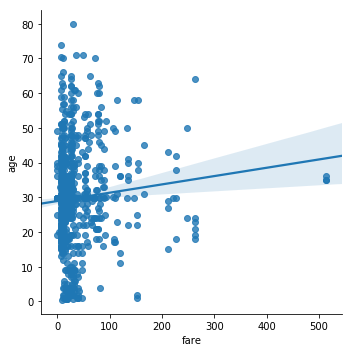

In [58]:
sns.lmplot(x = "fare", y = "age", data = titanic)  # correlation

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


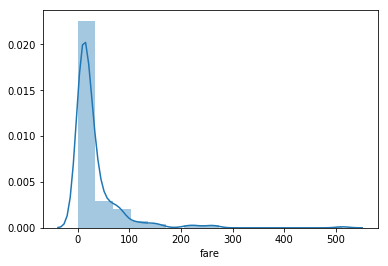

In [116]:
sns.distplot(titanic["fare"], bins = 15)

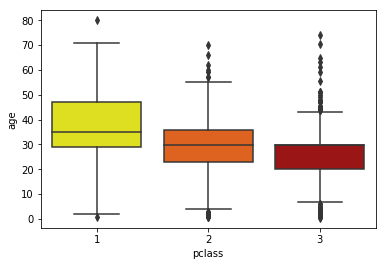

In [65]:
sns.boxplot(x = "pclass", y = "age", data = titanic, palette = "hot_r")

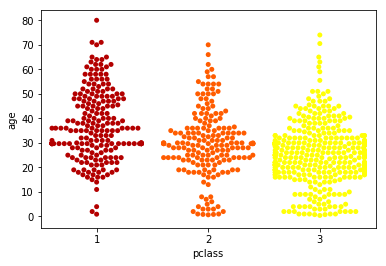

In [70]:
sns.swarmplot(x = "pclass", y = "age", data = titanic, palette = "hot")

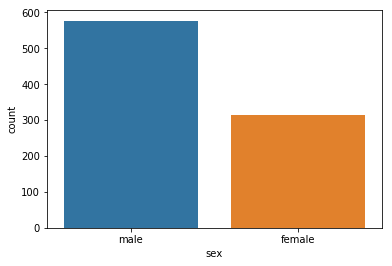

In [71]:
sns.countplot(x = "sex", data = titanic)

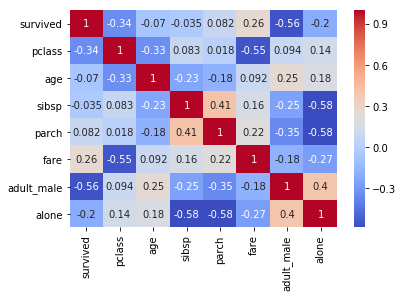

In [73]:
sns.heatmap(titanic.corr(), cmap = "coolwarm", annot = True)

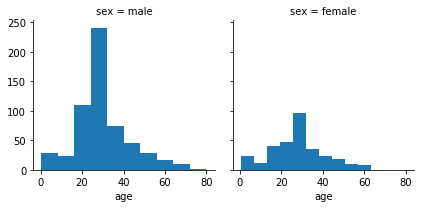

In [75]:
fg = sns.FacetGrid(titanic, col = "sex")
fg.map(plt.hist, "age")

In [76]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,True,Southampton,True


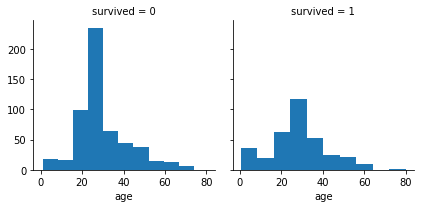

In [77]:
fg = sns.FacetGrid(titanic, col = "survived")
fg.map(plt.hist, "age")

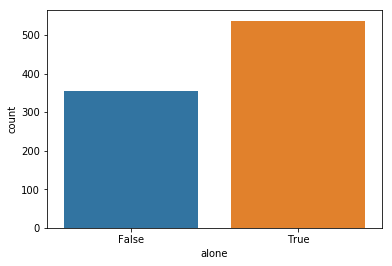

In [79]:
sns.countplot(data = titanic, x = "alone")

In [82]:
titanic.alone.replace([True, False], ["Alone", "With Family"], inplace = True)

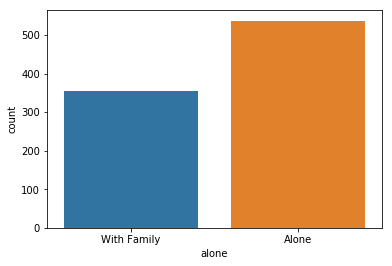

In [83]:
sns.countplot(data = titanic, x = "alone")

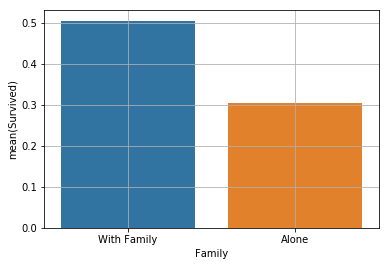

In [108]:
m_s = sns.barplot(x = "alone", y = "survived", data = titanic, ci = 0)
m_s.set_ylabel("mean(Survived)")
m_s.set_xlabel("Family")
plt.grid()